# Vapor-Liquid Equilibrium

As we saw in Chapter 2, fugacity is a core concept for equilibrium relationships. We established:

$$\overline{f}_i^L(T,P,\underline{x}) = \overline{f}_i^V(T,P,\underline{y}) $$

This is the core equilibrium relationship we will work with for VLE. The liquid and vapor phase fugacities of any component in a mixture will be the same when the system is at equilibrium (T and P will also be the same).

However, we rarely know fugacities in mixtures, so we will again lean on relationships between fugacities and activity coefficients.

$$\overline{f}_i^L(T,P,\underline{x}) = x_i\gamma_i(T,P,\underline{x})P_i^{vap}(T)\phi_i^{L,vap}(T,P) = \overline{f}_i^V(T,P,\underline{y}) = y_iP\overline{\phi}_i^V(T,P,\underline{y}) $$

This is called the <span style="color:#DA7407">$\gamma$-$\phi$ approach.</span> It has shortcomings:
- We use an EOS for vapor phase and an activity coefficient and model for the liqquid phase. These are different approaches. The properties of the two phases can never be identical. We will not have fully accurate represention near the vapor-liquid critical region.
- Other methods that use only activity coefficients and EOS would do a better job, but we will not explore them in this course.

The best approximation for pure liquid fugacity is Equation 7.4-21:

$$f^L = P^{vap}(T)\left ( \frac{f}{P} \right )_{sat,T} exp \left [ \frac{\underline{V}(P-P^{vap})}{RT} \right ] $$

If P is close to vapor pressure, then the exponential term drops (Poynting correction).

## Getting To Something Workable:

$$\overline{f}_i^L(T,P,\underline{x}) = x_i\gamma_i(T,P,\underline{x})P_i^{vap}(T)\phi_i^{L,vap}(T,P) = \overline{f}_i^V(T,P,\underline{y}) = y_iP\overline{\phi}_i^V(T,P,\underline{y}) $$

Recall the <span style="color:#DA7407">**The Lewis-Randall Rule**</span>:

$$\overline{f}_i^V(T,P,\underline{y}) = y_if_i^V(T,P)$$

We need to know the pure component vapor phase fugacity and vapor phase mole fraction.

<span style="color:#DA7407">**VLE at Low Pressures:**</span>

$$x_i\gamma_i(T,P,\underline{x})P_i^{vap}(T) \left(\frac{f}{P} \right)_{sat,i} = y_iP\left(\frac{f}{P}\right)_i $$

Summing over all components:

$$\sum{x_i\gamma_i(T,P,\underline{x})P_i^{vap}(T) \left(\frac{f}{P} \right)_{sat,i}} = P\sum{y_i\left(\frac{f}{P}\right)_i} $$

At low pressures, the gas phase is close to being ideal, so we can assume $\left ( \frac{f}{P} \right)_i = 1$. Our equation now becomes:

$$\sum{x_i\gamma_i(T,P,\underline{x})P_i^{vap}(T) \left(\frac{f}{P} \right)_{sat,i}} = P $$

And if the liquid phase is an ideal mixture, $\gamma_i = 1$ and $\frac{f}{P} = 1$, we get <span style="color:#DA7407">**Raoult's Law (for ideal liquid and vapor phases):**</span>

$$x_iP_i^{vap}(T) = y_iP = P_i$$

$$\sum{x_iP_i^{vap}(T)} = \sum{P_i} = P $$

How can we find $P^{vap}$ if we are not given it directly:

Use <span style="color:#DA7407">**Antoine Equation:**</span>

$$log\left(P^{vap}(T)\right) = A - \frac{B}{T+C} $$

The NIST Chem WebBook has $A,B,C$ parameters for many chemicals.

### Let's Do an Example

##### Create x,y and P-x,y charts for acetonitrile and 1-butanol at T = 333.15 K. Assume the mixture is ideal.

Recalling <span style="color:#DA7407">**Raoult's Law (for ideal liquid and vapor phases):**</span>

$$x_iP_i^{vap}(T) = y_iP = P_i$$

$$\sum{x_iP_i^{vap}(T)} = \sum{P_i} = P $$

The top equation becomes two equations, one for each component:

$$x_AP_A^{vap}(T) = y_AP = P_A$$
$$x_BP_B^{vap}(T) = y_BP = P_B$$

We can write the bottom equation for a binary mixture. Call acetonitrile "A" and 1-butanol "B":

$$x_AP_A^{vap}(T) + x_BP_B^{vap}(T) = P$$

And recall our mole balance equations:

$$x_A + x_B = 1$$

$$y_A + y_B = 1$$

#### Solving for Vapor Pressures

Now, let's look up the Antoine parameteres from NIST Chem WebBook. P is in bar and T is in K. We plug our values into the Antoine equation and solve for pressure.

In [5]:
T = 333.15 # K

##Antoine Coefficients
#Acetonitrile
A_ace = 4.27873
B_ace = 1355.374
C_ace = -37.853
#1-Butanol
A_but = 4.54607
B_but = 1351.55
C_but = -93.34

import numpy as np

## Calculating vapor pressure using Antoine Equation

Psat_ace = 10**(A_ace - (B_ace/(T + C_ace)))
Psat_but = 10**(A_but - (B_but/(T + C_but)))

print(f"Acetonitrile pressure:", round(Psat_ace,3), f"bar")
print(f"1-Butanol pressure:", round(Psat_but,3), f"bar")

Acetonitrile pressure: 0.488 bar
1-Butanol pressure: 0.081 bar


#### Calculating Phase Mole Fractions

First let's establish which variable we will iterate over. If we set the value of one variable, we can solve for all the others.
Let's set up an array of $x_A$ values, ranging from 0 to 1.

In [6]:
xA = np.linspace(0,1,11) ## here we choose 10 points to do our calculation at

## We know xB too, since xA + xB = 1

xB = 1 - xA

#### Solving For the Remaining Variables (P, $y_A$, $y_B$)

Since we have arrays of $x_A$ and $x_B$, we can now solve for $P$ and subsequently our vapor mole fractions ($y_A$ and $y_B$)

$$x_AP_A^{vap}(T) + x_BP_B^{vap}(T) = P$$

In [7]:
## Solving for overall system pressure, P

## We need to go through all of our xA (and xB) values to solve for P at each value

P = [] ## making an empty pressure array to store the values

for i in range(0,len(xA)): ## iterating over the length of xA, which is 10
    pressure = xA[i]*Psat_ace + xB[i]*Psat_but
    P.append(pressure)

Now for the vapor mole fractions:
    
$$x_AP_A^{vap}(T) = y_AP = P_A$$
$$x_BP_B^{vap}(T) = y_BP = P_B$$

Rearranging for $y_A$ and $y_B$:

$$y_A = \frac{x_AP_A^{vap}(T)}{P}$$

$$y_B = \frac{x_BP_B^{vap}(T)}{P}$$

*Note, we can also calculate $y_B$ with 1 - $y_A$*

In [8]:
## Let's solve

yA = []
yB = [] ## making blank arrays to store our vapor mole fraction values

for i in range(0,len(xA)): ## again, iterating over the length of xA. xB and P have the same lengths
    yA_calc = (xA[i]*Psat_ace)/P[i]
    yB_calc = (xB[i]*Psat_but)/P[i]
    yA.append(yA_calc)
    yB.append(yB_calc)

#### We have all the information we need to generate x,y and P-x,y charts!

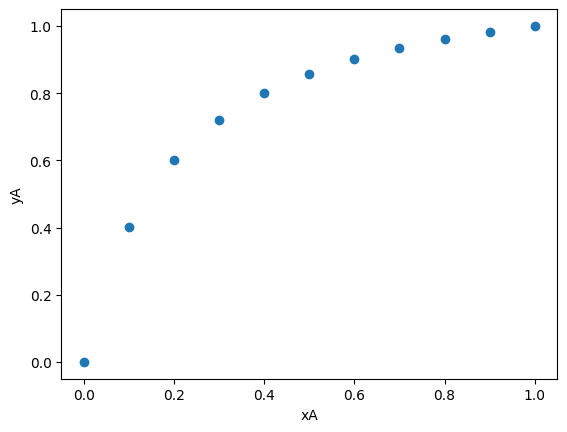

In [9]:
## We can plot

import matplotlib.pyplot as plt

## First, xy plot

plt.plot(xA,yA,"o")
plt.xlabel("xA")
plt.ylabel("yA")
plt.show()

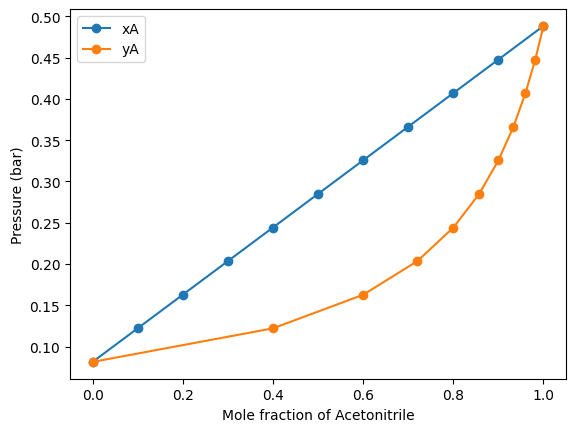

In [10]:
## And now P,x-y

plt.plot(xA,P,"-o")
plt.plot(yA,P,"-o")
plt.xlabel('Mole fraction of Acetonitrile')
plt.ylabel('Pressure (bar)')
plt.legend(['xA', 'yA'])
plt.show()

## Let's also generate a T-xy plot.

Assume that we now have a constant pressure of 101.325 kPa = 1.01325 bar. This problem requires iterative solving.

In [11]:
## Establishing new P
P = 1.0325 # bar

## Let's define a temperature range to iterative over:

T = np.linspace(300,400,101) #100 points ranging from 300 to 400 K. We can narrow this depending on our plot

## Let's define a function that will help us solve for temperature. We want to find the temperature that makes the xA\*PsatA + xB\*PsatB = P, or that makes P - (xA\*PsatA + xB\*PsatB) = 0.

In [20]:
def g(T,i): ## this is a function. we pass in a temperature (T) and an array index (i)
    PsatA = 10**(A_ace - (B_ace/(T + C_ace))) ## saturated pressure using inputted T
    PsatB = 10**(A_but - (B_but/(T + C_but)))
    Ptest = xA[i]*PsatA + xB[i]*PsatB
    yA = xA[i]*(PsatA/P) ## calculating vapor molar fraction of acetonitrile
    yB = xB[i]*(PsatB/P) ## calculating vapor molar fraction of 1-butanol
    diff = abs(P - Ptest) ## is how we can easily find a minimum. we want this value to be as close to zero as possible!
    return diff

## We need to define an initial guess array. We don't know what the temperature might be, so we might make a guess that the temperature is between 300 and 500C. We choose 1000 increments between 300 and 500 to be evaluated
#### Note: 1000 increments is arbitrary. One can choose any positive integer!

In [30]:
Temp = np.linspace(300,500,1000)

## Let's solve for our temperatures!

In [28]:
T = [] ## define an empty array to store our iterative solution temperature values.

for i in range(0,len(xA)): ## iterating over all the values in x1
    min_diff = 1000 ## we define a variable min_diff that "resets" our difference comparison
    for j in range(0,len(Temp)): ## iterating over all temperatures in Temp
        diff_out = g(Temp[j],i) ## using the function above to calculate the difference of pressures at a given temperature (j) and xA, xB (i)
        if diff_out < min_diff: ## if we reach a new minimum (less than the previous min_diff)
            min_diff = diff_out ## we establish whatever difference from the function output as the new min_diff
            True_temp = Temp[j] ## this pulls out the temperature at that minimum
    T.append(True_temp) ## this adds the minimum difference temperature to our empty array of iterative temperature values
    #print(f"Temperature: {True_temp},", f"Difference: {min_diff}") ## this prints the "True temperature" and minimum difference for each x1, x2 combo

## We have our liquid molar fractions and temperatures. We still need to calculate our y1 and y2 values with our "true" temperature.

#### We can use the Antoine Equation and Raoult's Law!

In [31]:
yA = []
yB = [] ##empty arrays to store the vapor mole fractions

for i in range(0,len(T)):
    PsatA = 10**(A_ace - (B_ace/(T[i] + C_ace))) ## saturated pressure using true T
    PsatB = 10**(A_but - (B_but/(T[i] + C_but)))
    yA.append(xA[i]*(PsatA/P)) ## calculating vapor molar fraction of acetonitrile and storing into yA
    yB.append(xB[i]*(PsatB/P)) ## calculating vapor molar fraction of 1-butanol and storing into yB

## Now, let's plot

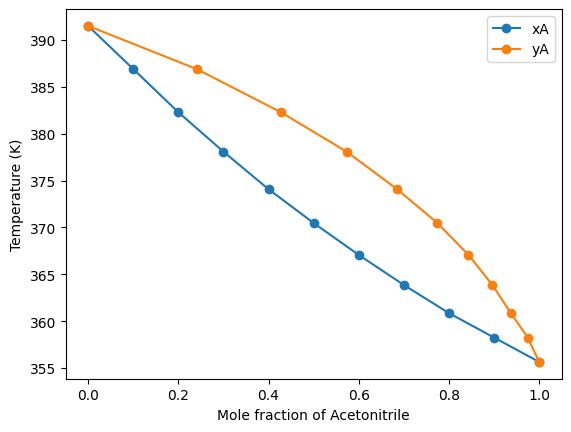

In [32]:
plt.plot(xA,T,"-o")
plt.plot(yA,T,"-o")
plt.xlabel('Mole fraction of Acetonitrile')
plt.ylabel('Temperature (K)')
plt.legend(['xA', 'yA'])
plt.show()

## Bubble Point

**ADD IMAGE**

Recall that <span style="color:#DA7407">**bubble point**</span> is the temperature or pressure where the first bubble of vapor forms when heating a mixture of two or more liquids.

### Let's calculate the bubble point temperature if we weren't given a plot.

Again, assume that we have a mixture of acetonitrile and 1-butanol and assume ideality for the mixture.

We want to calculate the bubble point temperature when the mixture is 25 mol% aceotnitrile and 75% 1-butanol at 1.01325 bar.

At the bubble point temperature, the first vapor bubble must be in equilibrium with the liquid phase (for which we know the composition), so the following relationships must be satisfied and the sum of mole fractions in each phase must be 1.

$$x_iP_i^{vap}(T) = y_iP = P_i$$
$$\sum{x_iP_i^{vap}(T)} = \sum{P_i} = P$$

### Let's first (re)establish our variables. We are resuing ones from the example problems above.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
## Liquid mole fractions
xA = .25
xB = .75

##Antoine Coefficients
#Acetonitrile
A_ace = 4.27873
B_ace = 1355.374
C_ace = -37.853
#1-Butanol
A_but = 4.54607
B_but = 1351.55
C_but = -93.34

P = 1.01325 #bar

## Let's define a temperature range to iterate over

Temp = np.linspace(300,500,1000) ## 300C to 500C over 1000 points

### We need to iterate over temperature to find the temperature that makes the sum of the vapor phase mole fractions equal to one

In [7]:
## creating a similar function to the iterative one above

def h(T): ## this is a function. we pass in a temperature (T)
    PsatA = 10**(A_ace - (B_ace/(T + C_ace))) ## saturated pressure using inputted T
    PsatB = 10**(A_but - (B_but/(T + C_but)))
    yA = xA*(PsatA/P) ## calculating vapor molar fraction of acetonitrile
    yB = xB*(PsatB/P) ## calculating vapor molar fraction of 1-butanol
    sumy = yA + yB
    diff = abs(1 - sumy) ## is how we can easily find a minimum. we want this value to be as close to zero as possible!
    return diff

In [11]:
## Let's solve!

min_diff = 1000 ## we define a variable min_diff that gives a comparison value

for i in range(0,len(Temp)): ## iterating over all temperatures in Temp
    diff_out = h(Temp[i]) ## using the function above to calculate the difference of (1-(y1+y2)) at a given temperature (j)
    if diff_out < min_diff: ## if we reach a new minimum (less than the previous min_diff)
        min_diff = diff_out ## we establish whatever difference from the function output as the new min_diff
        True_temp = Temp[i] ## this pulls out the temperature at that minimum

T = True_temp ## there should only be one "true" temperature that satisfies yA + yB = 1

print(f'Bubble Point Temperature',round(T,2))

Bubble Point Temperature 379.48


## Dew Point

**ADD IMAGE**

Recall that <span style="color:#DA7407">**dew point**</span> is the temperature or pressure where the first drop of liquid forms when cooling a mixture of two or more vapors.

### Let's calculate the dew point temperature if we weren't given a plot.

Again, assume that we have a mixture of acetonitrile and 1-butanol and assume ideality for the mixture.

We want to calculate the dew point temperature when the mixture is 25 mol% aceotnitrile and 75% 1-butanol at 1.01325 bar.

At the dew point temperature, the first dew drop must be in equilibrium with the vapor phase (for which we know the composition), so the following relationships must be satisfied and the sum of mole fractions in each phase must be 1.

$$x_iP_i^{vap}(T) = y_iP = P_i$$
$$\sum{x_iP_i^{vap}(T)} = \sum{P_i} = P$$

### We have a very similar problem to above, but now we want to solve for $x_A + x_B = 1$ since we know our vapor mole fractions

In [13]:
## Vapor mole fractions

yA = .25
yB = .75

## Our Antoine coefficients and pressure are the same as before

## We will use the same temperature guesses

Temp = np.linspace(300,500,1000) ## 300C to 500C over 1000 points

In [14]:
## Creating a new function similar to above

def k(T): ## this is a function. we pass in a temperature (T)
    PsatA = 10**(A_ace - (B_ace/(T + C_ace))) ## saturated pressure using inputted T
    PsatB = 10**(A_but - (B_but/(T + C_but)))
    xA = yA*P/PsatA ## calculating liquid molar fraction of acetonitrile
    xB = yB*P/PsatB ## calculating liquid molar fraction of 1-butanol
    sumx = xA + xB
    diff = abs(1 - sumx) ## is how we can easily find a minimum. we want this value to be as close to zero as possible!
    return diff

In [15]:
## Solving!

min_diff = 1000 ## we define a variable min_diff that gives a comparison value

for i in range(0,len(Temp)): ## iterating over all temperatures in Temp
    diff_out = k(Temp[i]) ## using the function above to calculate the difference of (1-(xA+xB)) at a given temperature (j)
    if diff_out < min_diff: ## if we reach a new minimum (less than the previous min_diff)
        min_diff = diff_out ## we establish whatever difference from the function output as the new min_diff
        True_temp = Temp[i] ## this pulls out the temperature at that minimum

T = True_temp ## there should only be one "true" temperature that satisfies yA + yB = 1

print(f'Dew Point Temperature',round(T,2))

Dew Point Temperature 386.09


## Non-ideality is More Often the Reality

$$\overline{f}_i^L(T,P,\underline{x}) = x_i\gamma_i(T,P,\underline{x})P_i^{vap}(T)\phi_i^{L,vap}(T,P) = \overline{f}_i^V(T,P,\underline{y}) = y_iP\overline{\phi}_i^V(T,P,\underline{y}) $$

Note that the activity coefficients are a function of temperature. Once we introduce them to account for non-ideality, we cannot write the pressure as a linear function of mole fractions and vapor pressures.

We have been treating the activity coefficient as though it were unity. For non-ideal systems, this is not the case and we need to calculate the activity coefficient.

### An Example:

We will do an example with a mixture of ethanol (E) and cyclohexane (C) at 303.15 K. We will create a P-x,y diagram.

We will assume that the activity coefficients are well-described by the <span style="color:#DA7407">**van Laar**</span> equation. Table 5.1 has the parameters for this system, although the temperature ranges of the validity is higher than the temperature we are at.

$$ ln(\gamma_1) = \frac{\alpha}{\left[1 + \frac{\alpha}{\beta}\frac{x_1}{x_2}\right]^2}$$

$$ ln(\gamma_2) = \frac{\beta}{\left[1 + \frac{\beta}{\alpha}\frac{x_2}{x_1}\right]^2}$$

We will also assume that the vapor phase acts relatively ideal. We then have an equilibrium relationship as follows:

$$P = x_E\gamma_EP_E^{vap} + x_C\gamma_CP_C^{vap}$$
$$y_iP = x_i\gamma_iP_i^{vap}$$

We can replace each $\gamma_i$ with its respective van Laar activity coefficient:

$$P = x_Eexp\left(\frac{\alpha}{\left[1 + \frac{\alpha}{\beta}\frac{x_1}{x_2}\right]^2}\right)P_E^{vap} + x_Cexp\left(\frac{\beta}{\left[1 + \frac{\beta}{\alpha}\frac{x_2}{x_1}\right]^2}\right)P_C^{vap}$$

$$y_E = \frac{x_Eexp\left(\frac{\alpha}{\left[1 + \frac{\alpha}{\beta}\frac{x_1}{x_2}\right]^2}\right)P_E^{vap}}{P}$$

Remember, we are at a fixed temperature so we can calculate $P^{vap}$ using the Antoine Equation.

**INSERT MATH (DON'T HAVE BETA AND ALPHA VALUES)**

**INSERT COMPARISON PLOTS**

In [30]:
## Making a P-x,y plot

xE = np.linspace(0.001,.9999,100) ## hundred values of xE to calculate P
## NOTE: We can't have 0 and 1 inclusive because we will encounter a dividing by zero error
xC = 1 - xE ## mole balance

T = 303.15 # K, our set temperature

alpha = 1 ## NEED THIS NUMBER

beta = 1 ## NEED THIS NUMBER

## Antoine Coefficients

A_eth = 4.92531
B_eth = 1432.526
C_eth = -61.819

A_cyc = 4.13983
B_cyc = 1316.554
C_cyc = -35.581

## Calculate Psat for ethanol and cyclohexane

PsatE = 10**(A_eth - (B_eth/(T + C_eth)))
PsatC = 10**(A_cyc - (B_cyc/(T + C_cyc)))

## Calculate the gammas

gammaE = []
gammaC = []

for i in range(0,len(xE)):
    lngammaE = alpha/(1+((alpha/beta)*(xE[i]/xC[i])))**2
    lngammaC = beta/(1+((beta/alpha)*(xC[i]/xE[i])))**2
    gammaE.append(np.exp(lngammaE))
    gammaC.append(np.exp(lngammaC))

## Calculate pressure and vapor mole fraction

P = [] ## empty array to store all the pressure values
yE = [] ## empty array to store all ethanol vapor values
yC = [] ## empty array to store all cyclohexane vapor values

for i in range(0,len(xE)): ## iterating over all our liquid mole fractions
    P_calc = xE[i]*gammaE[i]*PsatE + xC[i]*gammaC[i]*PsatC
    P.append(P_calc)
    
for i in range(0,len(xE)): ## iterating over all liquid mole fractions
    yE_calc = (xE[i]*gammaE[i]*PsatE)/P[i] ## remember, pressure is an array too!
    yE.append(yE_calc)
    yC.append(1-yE_calc)

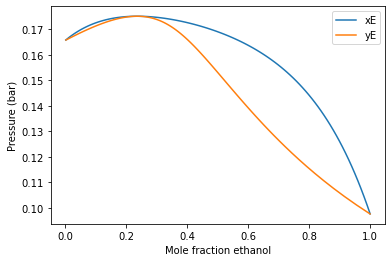

In [36]:
## we can plot

plt.plot(xE,P,'-')
plt.plot(yE,P, '-')
plt.legend(['xE','yE'])
plt.xlabel('Mole fraction ethanol')
plt.ylabel('Pressure (kPa)')
plt.show()

**COMPARING RESULTS** PUT IN FIGURES ETC